# Name - Faizan Ashraf

## Gamil - go2faizanashraf@gmail.com

<br>
<br>
<br>


## Importing necessary Modules

In [111]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
%matplotlib inline

<br>
<br>


## Importing data

In [14]:
df = pd.read_csv("data.csv")

In [3]:
df.head()

,x1,x2,y
0,-119.366669,115.000000,1
1,-101.108044,97.777159,1
2,-130.278658,106.767654,1
3,-114.703415,101.195477,1
4,-119.366669,115.000000,1


In [4]:
df.describe()

,x1,x2,y
count,2222.000000,2.224000e+03,2227.000000
mean,-4.818766,8.947626e+04,0.442299
std,74.939909,2.983323e+06,0.496771
min,-134.369160,-1.348761e+02,0.000000
25%,-71.757030,-8.012983e+01,0.000000
50%,-9.836555,-1.046151e+00,0.000000
75%,59.813962,6.389086e+01,1.000000
max,134.508687,1.000000e+08,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2227 entries, 0 to 2226
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      2222 non-null   float64
 1   x2      2224 non-null   float64
 2   y       2227 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 52.3 KB


In [6]:
df.isna().sum().sum()

8

<br>
<br>

## To see number of Missing values Columns wise.

In [15]:
df.isnull().sum()

x1    5
x2    3
y     0
dtype: int64

#### Here we see that there are very less missing values in each columns comparing to the total rows in Data Frame. So lets replace missing value of each Column my the mode of that column. 

<br>
<br>

In [24]:
col = df.columns
for column in col:
    df[column].fillna(df[column].mode()[0], inplace=True)
df.isnull().sum()

x1    0
x2    0
y     0
dtype: int64

### Now we see that there is no missing values in each columns

<br>
<br>


# VISUALIZATIONS

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


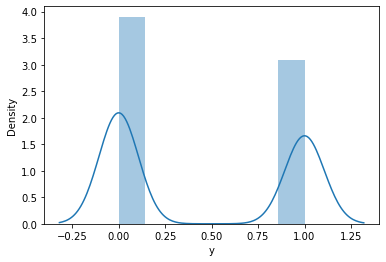

In [29]:
sns.distplot(df['y']);


<AxesSubplot:xlabel='y'>

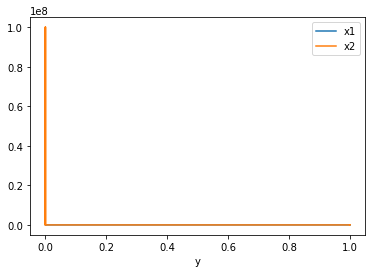

In [31]:
df.plot(x="y", y=["x1", "x2"], kind="line")

<AxesSubplot:xlabel='x2'>

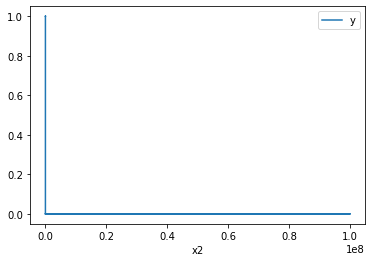

In [34]:
df.plot(x="x2", y=["y"], kind="line")

<AxesSubplot:xlabel='x1'>

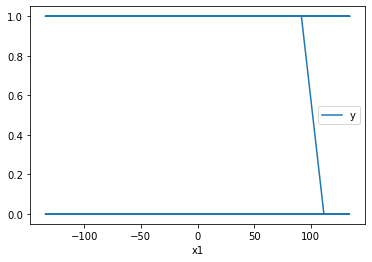

In [35]:
df.plot(x="x1", y=["y"], kind="line")

<AxesSubplot:xlabel='y', ylabel='count'>

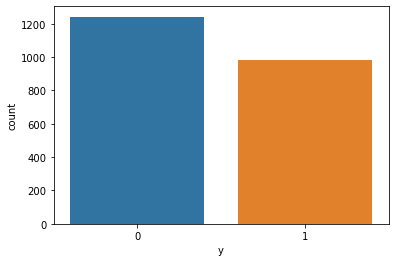

In [37]:
sns.countplot(x='y',data=df)

<br>

<h1><center>                      ----------------------- ML MODELING ----------------------

### 1) Logistic Regression

In [175]:
from sklearn.model_selection import train_test_split
X = df.drop('y', axis=1)
y = df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [176]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)

### Lets see Classification report

In [177]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.59      0.78      0.67       376
           1       0.52      0.30      0.38       293

    accuracy                           0.57       669
   macro avg       0.56      0.54      0.53       669
weighted avg       0.56      0.57      0.55       669



In [178]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9282511210762332


<br>
<br>

# SVM WITH LINEAR KERNEL

In [161]:
X = df.drop('y', axis=1)
y = df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [162]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)

In [163]:

y_pred = svclassifier.predict(X_test)

In [164]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[376   0]
 [293   0]]
              precision    recall  f1-score   support

           0       0.56      1.00      0.72       376
           1       0.00      0.00      0.00       293

    accuracy                           0.56       669
   macro avg       0.28      0.50      0.36       669
weighted avg       0.32      0.56      0.40       669



C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [165]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5620328849028401


<br>
<br>


# SVM with RBF Kernel

In [179]:
X = df[["x1","x2"]] 
y = df.y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)


In [180]:
from sklearn.svm import SVC
svm = SVC(kernel='rbf', random_state=1, gamma=0.1, C=0.02)

svm.fit(X_train, y_train)

SVC(C=0.02, gamma=0.1, random_state=1)

In [181]:
y_pred1 = svm.predict(X_test)

In [182]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred1))
print(classification_report(y_test,y_pred1))

[[376   0]
 [293   0]]
              precision    recall  f1-score   support

           0       0.56      1.00      0.72       376
           1       0.00      0.00      0.00       293

    accuracy                           0.56       669
   macro avg       0.28      0.50      0.36       669
weighted avg       0.32      0.56      0.40       669



C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [183]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9282511210762332


<br>
<br>

# Decision Tree


In [184]:
X = df[["x1","x2"]] 
y = df.y

In [185]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [186]:
clf = DecisionTreeClassifier()

clf = clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

In [187]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9312406576980568


<br>
<br>


# Compairing all the models

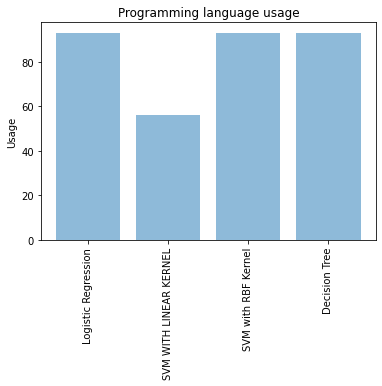

In [189]:
objects = ('Logistic Regression', 'SVM WITH LINEAR KERNEL', 'SVM with RBF Kernel', 'Decision Tree')
y_pos = np.arange(len(objects))
performance = [92.82,56.20,92.83,93.12]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.xticks(rotation=90)
plt.ylabel('Usage')
plt.title('Programming language usage')

plt.show()

# So here i conclude that SVM WITH LINEAR KERNEL is the worst model for our data and rest all model perform almost similar but Decision tree in better than all by 1% 